In [1]:
fnames = io.l1b_filenames('mvn_iuv_l1b_cruisecal2-mode080-muv_20140521T12002', iterator=False)

In [2]:
fname = fnames[0]
fnames # checking if there's more than one version of it in stage.

['/Users/klay6683/data/iuvs/level1b/mvn_iuv_l1b_cruisecal2-mode080-muv_20140521T120029_v01_r01.fits.gz']

In [3]:
import seaborn as sns
sns.set_context('notebook')
sns.set_style('white')

In [4]:
l1b = io.L1BReader(fname)

In [6]:
%matplotlib notebook

<IPython.core.display.Javascript object>


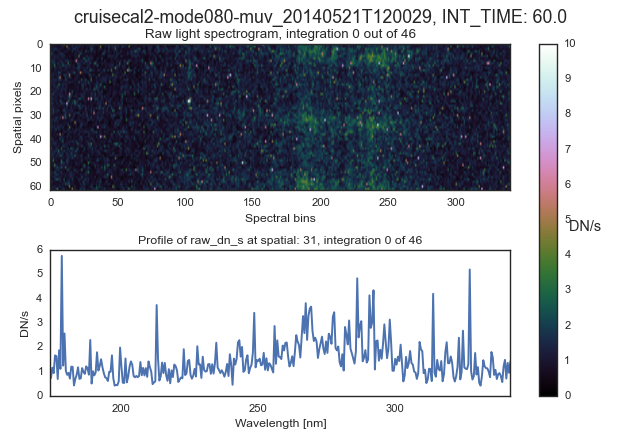

In [7]:
l1b.plot_raw_overview(0, save_token='1_int0', proflog=False, imglog=False);

<IPython.core.display.Javascript object>


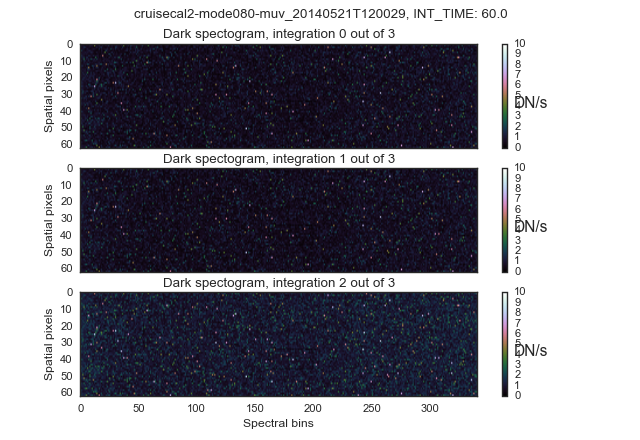

In [18]:
l1b.plot_dark_spectrograms()

<IPython.core.display.Javascript object>


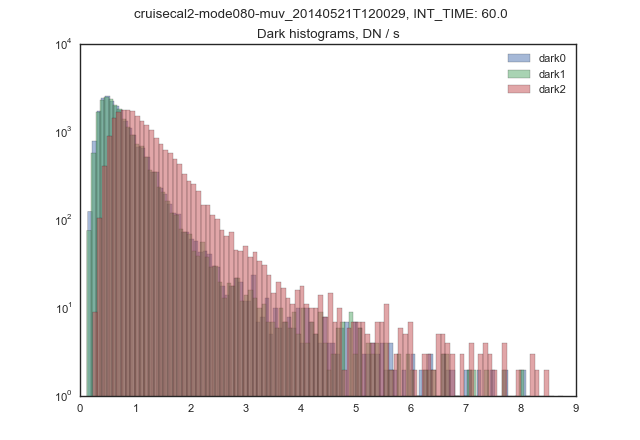

In [15]:
l1b.plot_dark_histograms(save=True)

<IPython.core.display.Javascript object>


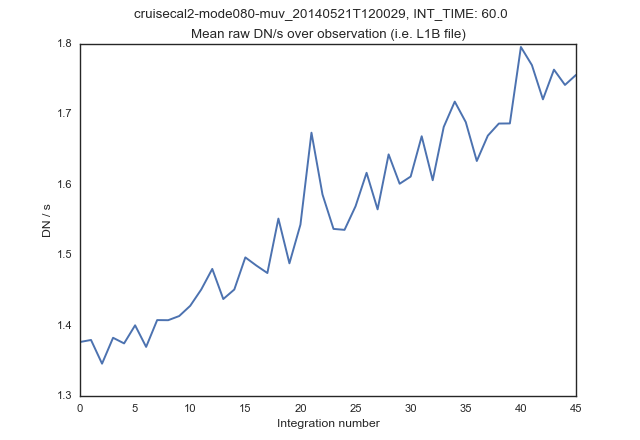

In [16]:
l1b.plot_mean_raw_values()

In [51]:
import os
def plot_coeffs(results, j, token=''):
    results.index.name = 'Integrations'
    results.filter(regex='Scaler').plot(title="Dark{} against all lights, {}".format(j, token),
                                        ylim=[-0.5, 2])
    for col,ls in zip(results.filter(regex='poly1_'), ['-', '--']):
        results[col].plot(color=sns.color_palette()[2], legend=True, linestyle=ls)
    for col,ls in zip(results.filter(regex='poly2_'), ['-', '--','-.']):
        results[col].plot(color=sns.color_palette()[3], legend=True, linestyle=ls)
    savename = os.path.join(str(io.plotfolder),
                            'dark{}_vs_all_lights_'+token+'.png').format(j)
    plt.savefig(savename, dpi=150)    

from iuvs.multitools import *
def fit_over_integrations(myslice=None, spa_slice=None, spe_slice=None):
    all_coeffs = []
    all_residual_std = []
    for j in range(l1b.n_darks)[myslice:myslice]:
        print('doing dark {}'.format(j))
        coeffs = []
        residual_mean = []
        residual_std = []
        current_residual_mean = []
        current_residual_std = []
        prog = IntProgress(min=0, max=l1b.n_integrations)
        display(prog)
        for i in range(l1b.n_integrations):
            fitter = scaling.DarkFitter(l1b, i, j, spa_slice=spa_slice, spe_slice=spe_slice)
            coeffs.append(fitter.p_dicts)
            residual_mean.append(fitter.residual_mean)
            residual_std.append(fitter.residual_std)
            current_residual_mean.append(fitter.currentresidual.mean())
            current_residual_std.append(fitter.currentresidual.std())
            prog.value = i
        all_coeffs.append(pd.DataFrame(coeffs))
#         residual_mean = pd.DataFrame(residual_mean)
        residual_std = pd.DataFrame(residual_std)
#         residual_mean['current'] = current_residual_mean
        residual_std['current'] = current_residual_std
        all_residual_std.append(residual_std)
    return all_coeffs, all_residual_std

# Automatic scaling window

In [65]:
plt.close('all')
sns.set_palette('bright', 5)

In [66]:
coeffs, res_std = fit_over_integrations()

doing dark 0
doing dark 1
doing dark 2


<IPython.core.display.Javascript object>


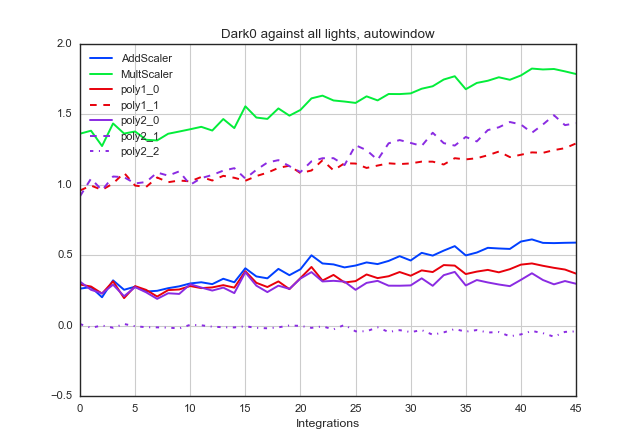

<IPython.core.display.Javascript object>


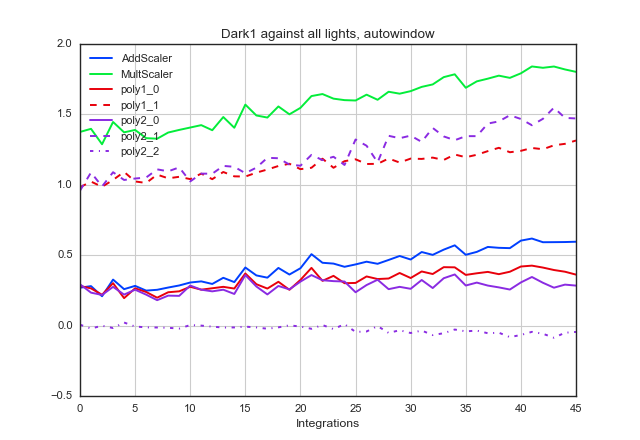

<IPython.core.display.Javascript object>


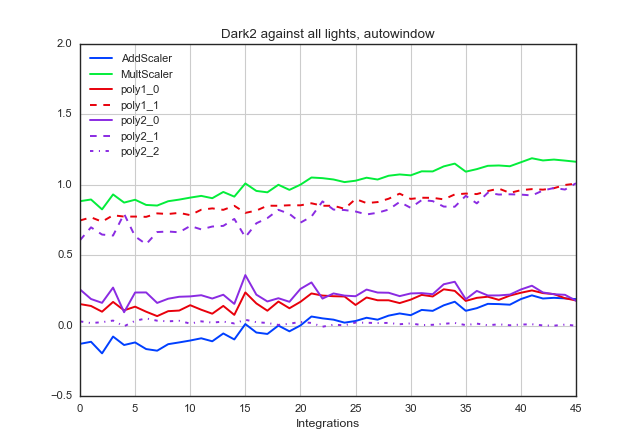

In [67]:
for j in range(3):
    plot_coeffs(coeffs[j], j, token='autowindow')

<IPython.core.display.Javascript object>


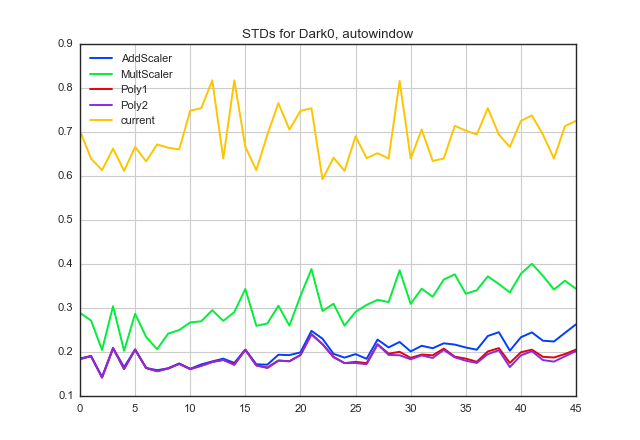

<IPython.core.display.Javascript object>


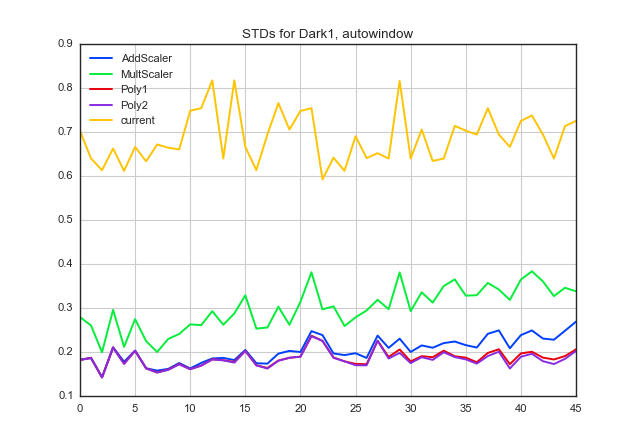

<IPython.core.display.Javascript object>


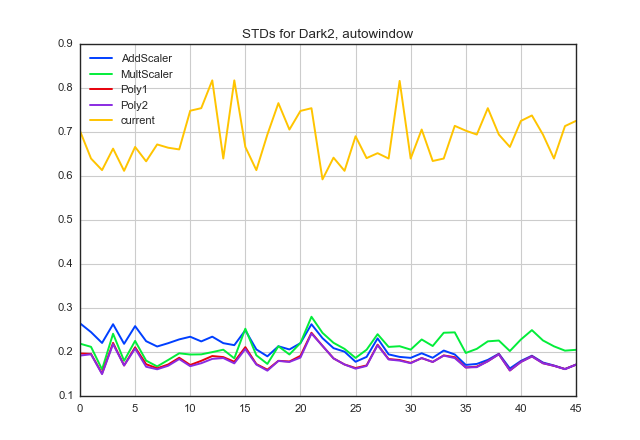

In [68]:
for j in range(3):
    res_std[j].plot(title='STDs for Dark{}, autowindow'.format(j), ylim=(0.1, 0.9))
    plt.savefig('/Users/klay6683/plots/STDs_dark{}_autowindow.png'.format(j), dpi=150)

# Fixed scaling window

In [69]:
spa_slice, spe_slice = l1b.find_scaling_window(l1b.raw_dn_s[0])

In [70]:
coeffs, res_std = fit_over_integrations(spa_slice=spa_slice, spe_slice=spe_slice)

doing dark 0
doing dark 1
doing dark 2


<IPython.core.display.Javascript object>


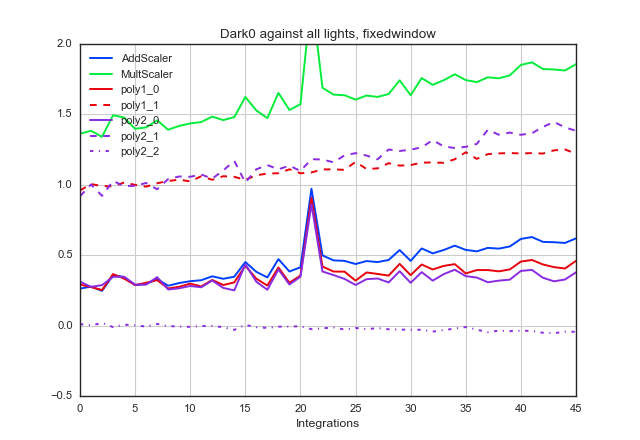

<IPython.core.display.Javascript object>


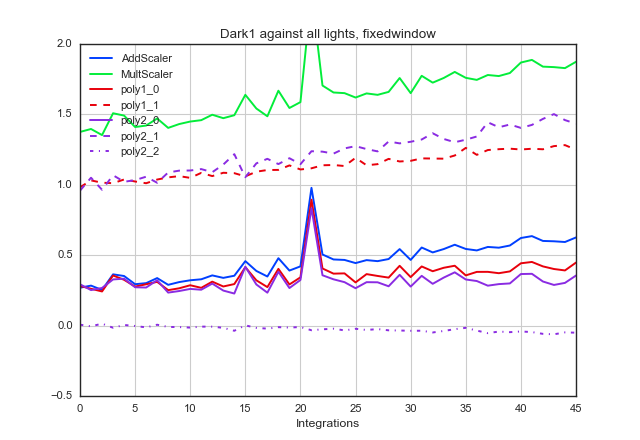

<IPython.core.display.Javascript object>


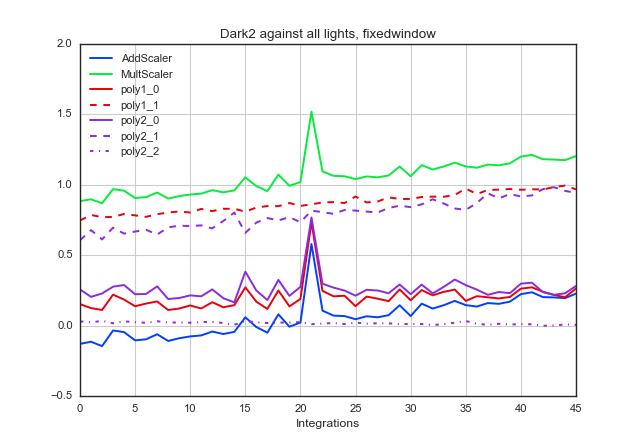

In [71]:
for j in range(3):
    plot_coeffs(coeffs[j], j, token='fixedwindow')

<IPython.core.display.Javascript object>


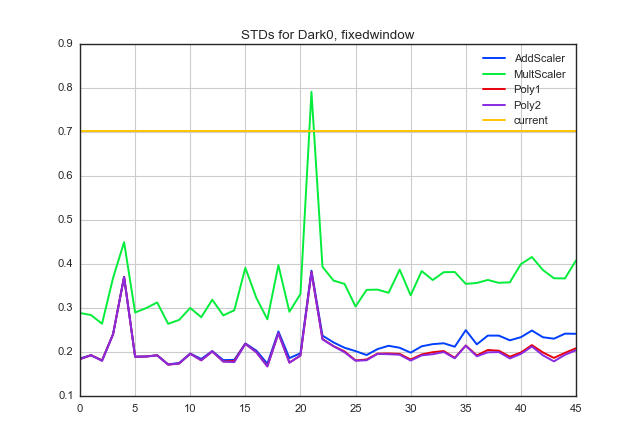

<IPython.core.display.Javascript object>


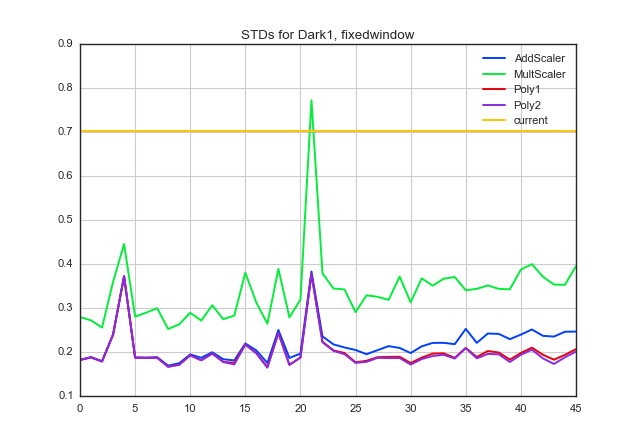

<IPython.core.display.Javascript object>


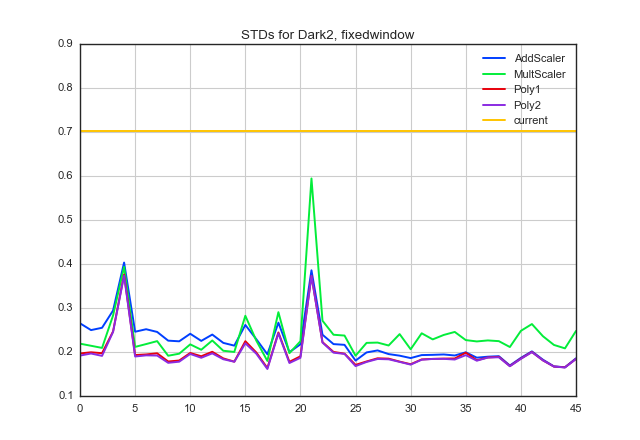

In [72]:
for j in range(3):
    res_std[j].plot(title='STDs for Dark{}, fixedwindow'.format(j), ylim=(0.1, 0.9))
    plt.savefig('/Users/klay6683/plots/STDs_dark{}_fixedwindow.png'.format(j), dpi=150)

In [69]:
plt.close('all')

In [61]:
pwd

'/Users/klay6683/Dropbox/src/iuvs/notebooks'

In [62]:
!ls STD*

STDs_dark0_autowindow.png  STDs_dark1_autowindow.png  STDs_dark2_autowindow.png
STDs_dark0_fixedwindow.png STDs_dark1_fixedwindow.png STDs_dark2_fixedwindow.png


In [63]:
!mv STD*.png /Users/klay6683/plots/